<a href="https://colab.research.google.com/github/Yassaadi/energy_ghg_prediction/blob/main/P4_GHG_Emission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YASSINE ASSAADI, DS-P4

Mounted at /content/drive


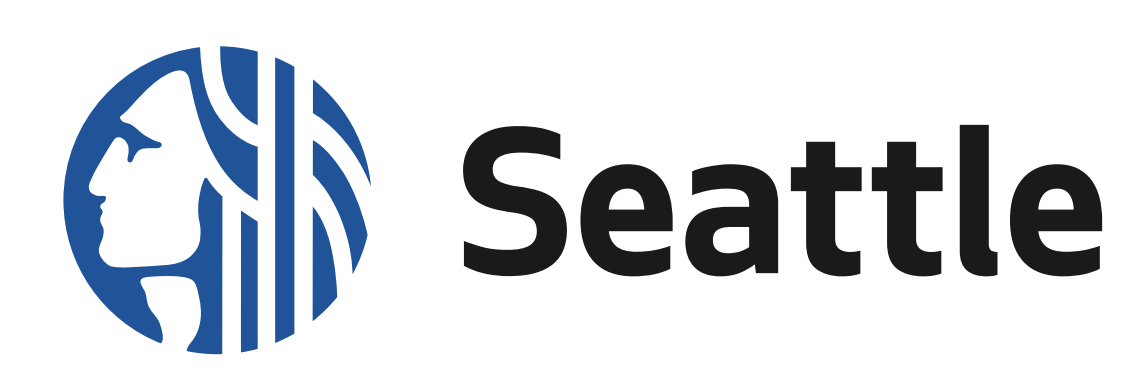

In [ ]:
#GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/P4-Energy&GHG/Seattle.png',width=250, height=100, )

# Project descritption

This project is dedicated to estimate Seattle city buildings annual GHG emission and total energy consumption. In particular, non residential buildings based on 2016 collected data.
This project contains three notebooks as follows:

1.   Assaadi_Yassine_1_notebook_exploratoire_102022: data cleaning, features distribution and transformation, outliers elimination and model subspaces creation.

2.   Assaadi_Yassine_2_notebook_prediction_102022: Concerns GHG emission, it contains models testing, best estimator choice and features effect on the model analysis.

3.   Assaadi_Yassine_3_notebook_prediction_102022: Concerns total energy consumption,it contains as well models testing, best estimator choice and features effect on the model analysis.

Link to data source:
https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

Here is a flow chart of all data evolution, from basic cleaning until pre-modeling phase.

In [ ]:
#BASIC LIBs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#STAT TOOLS
from math import sqrt
from scipy import stats #BoxCox
import random
from numpy.lib.function_base import percentile
from pandas.core.algorithms import quantile

#GRAPHS
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

#TRANSFORMATION
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

#METRICS
from sklearn.metrics import mean_squared_error, r2_score

#DATA SPLITING
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#IMPUTERS
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#REGRESSION MODELS
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.dummy import DummyRegressor

#GRID SEARCH
from sklearn.model_selection import GridSearchCV

#PIPELINES
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Columns & rows size
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


#graphs default configuration
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_formats = ['svg']

In [ ]:
Path= "/content/drive/MyDrive/Colab Notebooks/P4-Energy&GHG/P4-Prepared_Data.csv"

df5 = pd.read_csv(Path,encoding="utf-8")

df5= df5.drop('SiteEnergyUse(kBtu)', axis=1)

df5= df5.set_index('index', drop=True)

In [ ]:
df5.head(2)

,BuildingType,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore_Median,TotalGHGEmissions,Steam,Gas,BuildingUse,Sensitivity,UseType_Multifamily Housing,UseType_Office,UseType_Non-Refrigerated Warehouse,UseType_K-12 School,UseType_Retail Store,UseType_Hotel,UseType_Worship Facility,UseType_Distribution Center,UseType_Senior Care Community,UseType_Supermarket/Grocery Store,UseType_Medical Office,UseType_Parking,UseType_Self-Storage Facility,UseType_College/University,UseType_Residence Hall/Dormitory,UseType_Other - Recreation,UseType_Other - Entertainment/Public Assembly,UseType_Laboratory,UseType_Refrigerated Warehouse,UseType_Restaurant,UseType_Social/Meeting Hall,UseType_Hospital (General Medical & Surgical),UseType_Manufacturing/Industrial Plant,"UseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",UseType_Other - Lodging/Residential,UseType_Strip Mall,UseType_Fitness Center/Health Club/Gym,UseType_Other - Services,UseType_Museum,UseType_Automobile Dealership,UseType_Bank Branch,UseType_Urgent Care/Clinic/Other Outpatient,UseType_Other/Specialty Hospital,UseType_Other - Mall,UseType_Library,UseType_Financial Office,UseType_Other - Education,UseType_Data Center,UseType_Performing Arts,UseType_Adult Education,UseType_Pre-school/Daycare,UseType_Other - Utility,UseType_Other - Restaurant/Bar,UseType_Other - Public Services,UseType_Lifestyle Center,UseType_Courthouse,UseType_Fire Station,UseType_Police Station,UseType_Residential Care Facility,UseType_Wholesale Club/Supercenter,UseType_Food Service,UseType_Movie Theater,"UseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",UseType_Swimming Pool,UseType_Food Sales,UseType_Bar/Nightclub,UseType_Enclosed Mall,UseType_Vocational School,UseType_Convenience Store without Gas Station,ENERGYSTARScore_knn1,ENERGYSTARScore_knn2,ENERGYSTARScore_knn5,ENERGYSTARScore_knn6,ENERGYSTARScore_knn7,ENERGYSTARScore_knn8,ENERGYSTARScore_knn10
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NonResidential,-0.246856,-0.118337,-1.254151,1.661620,0.783524,-0.602462,1.331884,1,1,-0.150359,-1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.380835,-0.398477,-0.399238,-0.402511,-0.401941,-0.406605,-0.410004
1,NonResidential,-0.226501,0.031301,0.829597,1.557797,0.935720,-0.557336,1.428035,0,1,-0.150359,-1.0,0.0,0.0,0.0,0.0,0.0,0.809918,0.0,0.0,0.0,0.0,0.0,0.145453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.342281,-0.357751,-0.356972,-0.359989,-0.359284,-0.363812,-0.367020


# 6. Subspaces



## 6.1. ENERGYSTARScore effect on the model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

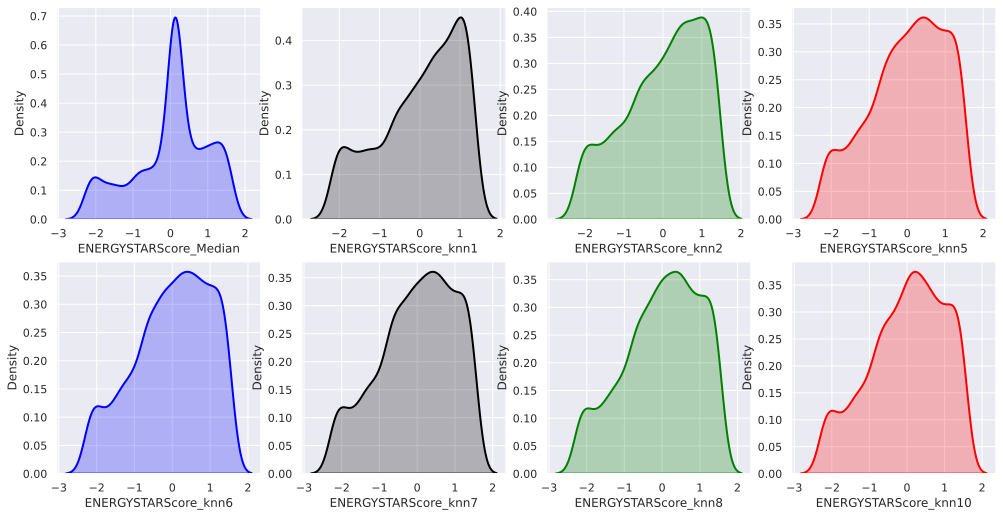

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(15,8))

#ENERGYSTARScore with simple imputer = median
sns.distplot(df5['ENERGYSTARScore_Median'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[0,0])
#ENERGYSTARScore with knn=1
sns.distplot(df5['ENERGYSTARScore_knn1'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='black', ax=axs[0,1])
#ENERGYSTARScore with knn=2
sns.distplot(df5['ENERGYSTARScore_knn2'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[0,2])
#ENERGYSTARScore with knn=5
sns.distplot(df5['ENERGYSTARScore_knn5'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[0,3])
#ENERGYSTARScore with knn=6
sns.distplot(df5['ENERGYSTARScore_knn6'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[1,0])
#ENERGYSTARScore with knn=7
sns.distplot(df5['ENERGYSTARScore_knn7'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='black', ax=axs[1,1])
#ENERGYSTARScore with knn=8
sns.distplot(df5['ENERGYSTARScore_knn8'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[1,2])
#ENERGYSTARScore with knn=10
sns.distplot(df5['ENERGYSTARScore_knn10'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[1,3])

## 6.2. Building Types effect on the model

In [ ]:
data_resid = df5.copy()
data_Nresid = df5.copy()
Residences = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

data_resid = data_resid[data_resid['BuildingType'].isin(Residences)]
data_Nresid = data_Nresid[~data_Nresid['BuildingType'].isin(Residences)]
data_resid.shape

(1603, 78)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

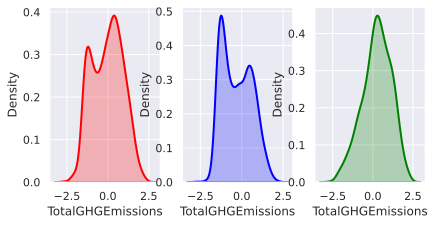

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(6,3))

sns.distplot(df5['TotalGHGEmissions'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[0])
sns.distplot(data_resid['TotalGHGEmissions'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[1])
sns.distplot(data_Nresid['TotalGHGEmissions'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[2])

plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
        y=df5['TotalGHGEmissions'],
        name= 'TotalGHGEmissions',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        ))
fig.add_trace(go.Box(
        y=data_resid['TotalGHGEmissions'],
        name= 'Residential TotalGHGEmissions',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        ))
fig.add_trace(go.Box(
        y=data_Nresid['TotalGHGEmissions'],
        name= 'Non residential TotalGHGEmissions',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
         ))

fig.update_layout(title= "Distribution of GHG Emissions for Residential/Non Residential")
fig.show()

## 6.3. Model features selection

In [ ]:
#Out of bag features
OOBF = ['ENERGYSTARScore_Median',#0,  Estimated ENERGYSTARScore with simple MEDIAN imputation
        'ENERGYSTARScore_knn1',  #1,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 1
        'ENERGYSTARScore_knn2',  #2,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 2
        'ENERGYSTARScore_knn5',  #3,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 5
        'ENERGYSTARScore_knn6',  #4,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 6
        'ENERGYSTARScore_knn7',  #5,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 7
        'ENERGYSTARScore_knn8',  #6,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 8
        'ENERGYSTARScore_knn10',  #7,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 10
        'BuildingType'           #8
        ]

#Features to exclude
F = OOBF.copy()
F.remove('ENERGYSTARScore_knn5')
X = df5.drop(F ,  axis=1)
X.head(1)

,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Steam,Gas,BuildingUse,Sensitivity,UseType_Multifamily Housing,UseType_Office,UseType_Non-Refrigerated Warehouse,UseType_K-12 School,UseType_Retail Store,UseType_Hotel,UseType_Worship Facility,UseType_Distribution Center,UseType_Senior Care Community,UseType_Supermarket/Grocery Store,UseType_Medical Office,UseType_Parking,UseType_Self-Storage Facility,UseType_College/University,UseType_Residence Hall/Dormitory,UseType_Other - Recreation,UseType_Other - Entertainment/Public Assembly,UseType_Laboratory,UseType_Refrigerated Warehouse,UseType_Restaurant,UseType_Social/Meeting Hall,UseType_Hospital (General Medical & Surgical),UseType_Manufacturing/Industrial Plant,"UseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",UseType_Other - Lodging/Residential,UseType_Strip Mall,UseType_Fitness Center/Health Club/Gym,UseType_Other - Services,UseType_Museum,UseType_Automobile Dealership,UseType_Bank Branch,UseType_Urgent Care/Clinic/Other Outpatient,UseType_Other/Specialty Hospital,UseType_Other - Mall,UseType_Library,UseType_Financial Office,UseType_Other - Education,UseType_Data Center,UseType_Performing Arts,UseType_Adult Education,UseType_Pre-school/Daycare,UseType_Other - Utility,UseType_Other - Restaurant/Bar,UseType_Other - Public Services,UseType_Lifestyle Center,UseType_Courthouse,UseType_Fire Station,UseType_Police Station,UseType_Residential Care Facility,UseType_Wholesale Club/Supercenter,UseType_Food Service,UseType_Movie Theater,"UseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",UseType_Swimming Pool,UseType_Food Sales,UseType_Bar/Nightclub,UseType_Enclosed Mall,UseType_Vocational School,UseType_Convenience Store without Gas Station,ENERGYSTARScore_knn5
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.246856,-0.118337,-1.254151,1.66162,0.783524,1.331884,1,1,-0.150359,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.399238


In [ ]:
y = X['TotalGHGEmissions']
x= pd.get_dummies(X, drop_first=True).drop(['TotalGHGEmissions'],axis=1)

## 6.4. Correlation check

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning:

All-NaN slice encountered



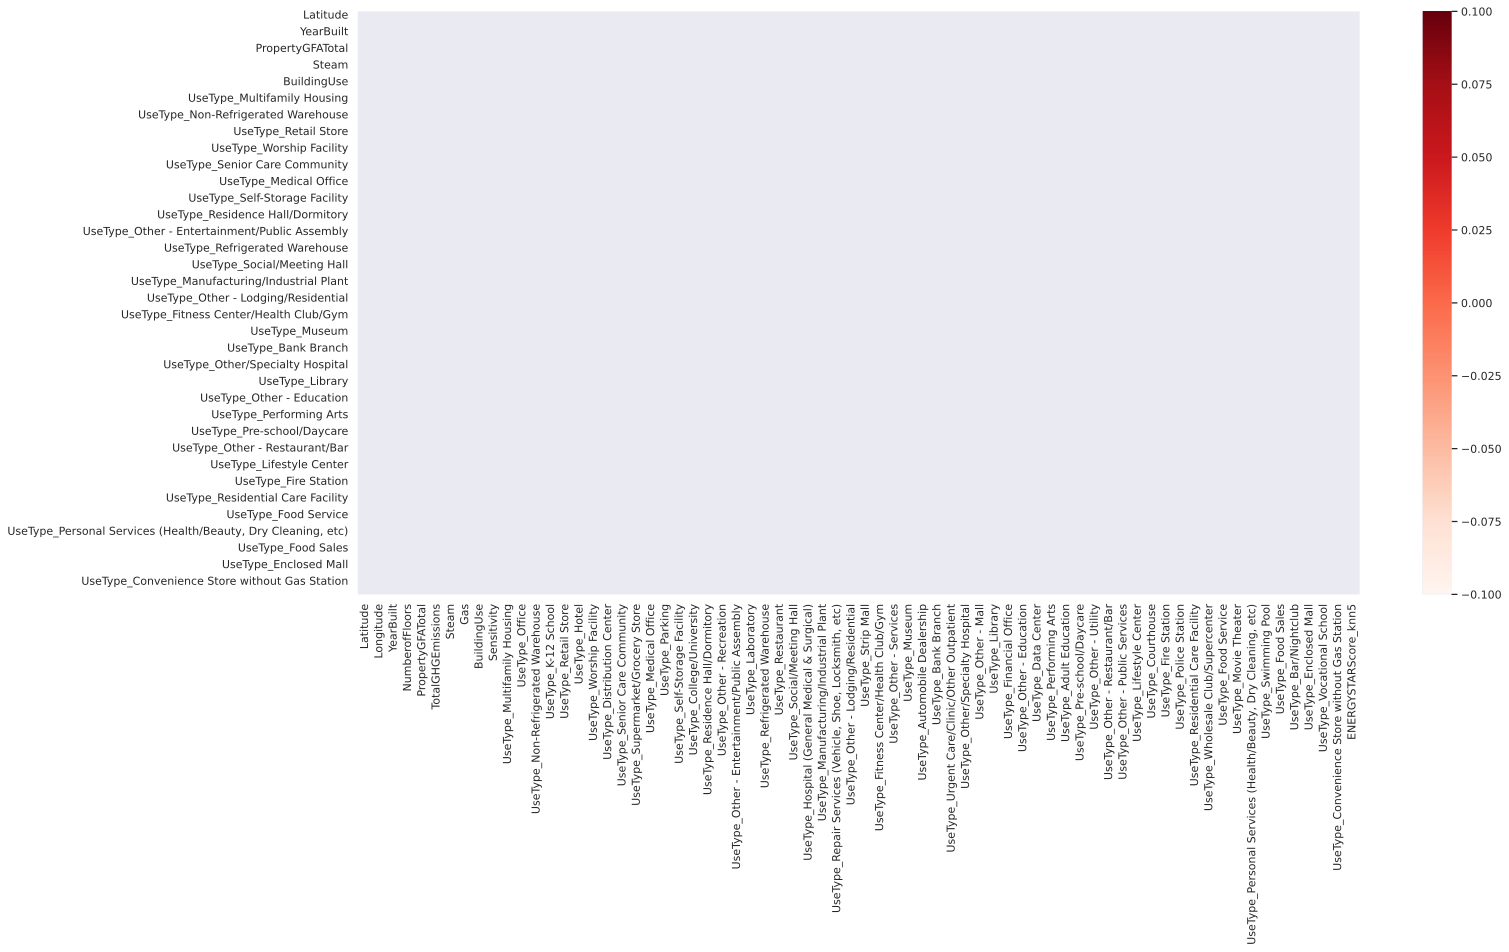

In [ ]:
corr = X.corr()
HighCorr = corr[((corr >= .7) | (corr <= -.7)) & (corr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(HighCorr, annot=True, cmap="Reds")
#plt.show()

In [ ]:
HCVariable = HighCorr.unstack().sort_values().drop_duplicates()
HCVariable

Latitude  Latitude   NaN
dtype: float64

# 7. Pre-modeling: Metrics and functions

## 7.1. Models comparator

In [ ]:
Metrics = np.array(['R2', 'RMSE', 'GridS-R2', 'GridS-RMSE'])

In [ ]:
ModelCompare = pd.DataFrame({'Metrics' : Metrics})
ModelCompare

,Metrics
0,R2
1,RMSE
2,GridS-R2
3,GridS-RMSE


## 7.2. Model evaluator

In [ ]:
def AlgEval(y_eval, y_pred):
  RMSE = round(sqrt(mean_squared_error(y_eval, y_pred )),2)
  R2 = round(r2_score(y_eval, y_pred ),2)
  return(RMSE,R2)

def EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train):
  print("Model metrics")
  print(f"train RMSE= {RMSE_train} - train R2= {R2_train} ")
  print(f"test RMSE= {RMSE_test} - test R2= {R2_test} ")

## 7.6. Cross validation

### 7.6.1. Algorithm

In [ ]:
def ModelEval(Algorithm, x_train, y_train, x_test, y_test):

  Algorithm.fit(x_train, y_train)
  test_pred = Algorithm.predict(x_test)
  train_pred = Algorithm.predict(x_train)

  RMSE_train, R2_train = AlgEval(y_train, train_pred)
  RMSE_test, R2_test = AlgEval(y_test, test_pred)

  return (RMSE_test, R2_test, RMSE_train, R2_train)

### 7.6.2. Scorers

In [ ]:
def R2(Algorithm, x, y):
  x_pred = Algorithm.predict(x)
  RMSE= round(sqrt(mean_squared_error(y, x_pred)),2)
  R2= round(r2_score(y, x_pred),2)
  print(f"RMSE= {RMSE} - R2= {R2} ")
  return R2

In [ ]:
def RMSE(Algorithm, x, y):
  x_pred = Algorithm.predict(x)
  RMSE= round(sqrt(mean_squared_error(y, x_pred)),2)
  R2= round(r2_score(y, x_pred),2)
  return RMSE

## 7.4. Iterations with simple split

In [ ]:
def Dichotomous_split(Algorithm, x,y,iteration):

  Atest_RMSE, Atest_R2 = 0.0, 0.0
  Atrain_RMSE, Atrain_R2 = 0.0, 0.0

  for i in range(iteration):

    x_train, x_test,  y_train, y_test = train_test_split(x,y,test_size = 0.2) #Data simple split


    RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

    Atest_RMSE = Atest_RMSE + RMSE_test
    Atest_R2 = Atest_R2 + R2_test
    Atrain_RMSE = Atrain_RMSE + RMSE_train
    Atrain_R2 = Atrain_R2 + R2_train


  return(round(Atest_RMSE/iteration,2), round(Atest_R2/iteration,2))

## 7.5.  Plot function

In [ ]:
def ModelPlot(Algorithm ,x_train, y_train, x_test, y_test):

  Algorithm.fit(x_train, y_train)
  test_pred = Algorithm.predict(x_test)
  train_pred = Algorithm.predict(x_train)

  RMSE_train, R2_train = AlgEval(y_train, train_pred)
  RMSE_test, R2_test = AlgEval(y_test, test_pred)

  fig = plt.figure(figsize= (7,4))
  plt.scatter(y_test, test_pred, color='blue')
  plt.title('Prediction of the model', size= 13)
  plt.xlabel("Observations", size= 12)
  plt.ylabel("Predictions", size= 12)
  plt.plot(y_test, y_test,'red', lw=1)
  plt.show()

# 8. Modeling

## Dummy regressor

In [ ]:
Algorithm = DummyRegressor(strategy = 'median')

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)
RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)
EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.95 - train R2= -0.01 
test RMSE= 0.92 - test R2= -0.0 


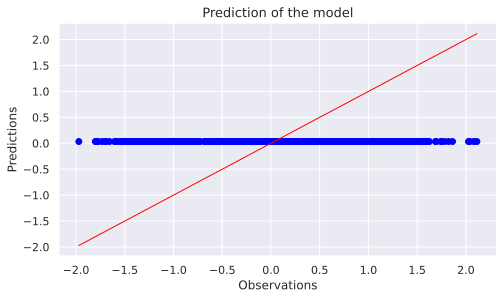

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
DummyReg = []
DummyReg_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
DummyReg_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
DummyReg = [np.mean(DummyReg_R2), np.mean(DummyReg_RMSE)]
DummyReg = np.pad(DummyReg,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Dummy regressor'] = DummyReg
ModelCompare

RMSE= 1.12 - R2= -0.93 
RMSE= 0.9 - R2= -0.04 
RMSE= 1.01 - R2= -0.27 
RMSE= 0.96 - R2= -0.21 
RMSE= 0.93 - R2= -0.01 


,Metrics,Dummy regressor
0,R2,-0.292
1,RMSE,0.984
2,GridS-R2,NaN
3,GridS-RMSE,NaN


## A. Linear Regression

### A1. Default parameters

In [ ]:
Algorithm = LinearRegression ()

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)
RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)
EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.42 - train R2= 0.79 
test RMSE= 0.45 - test R2= 0.78 


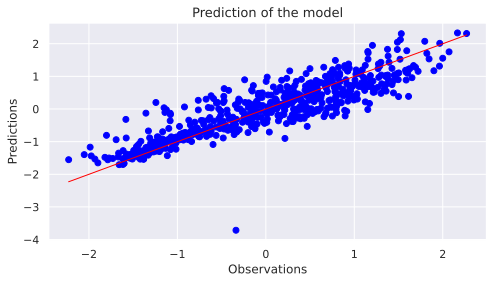

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

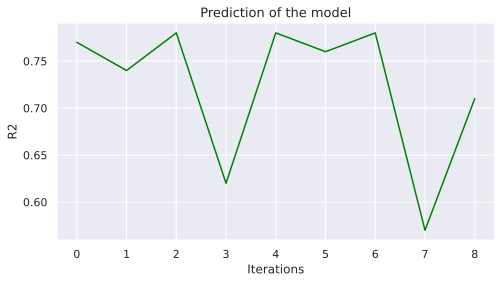

In [ ]:
max_iteration = 10
rmse = []
r2 = []

for iteration in range(1, max_iteration):

    RMSE_, R2_ = Dichotomous_split(Algorithm, x, y, iteration)
    r2.append(R2_)
    rmse.append(RMSE_)

fig = plt.figure(figsize= (7,4))
plt.plot(range(iteration), r2, color='green', lw=1.5)
plt.title('Prediction of the model', size= 13)
plt.xlabel("Iterations", size= 12)
plt.ylabel("R2", size= 12)
plt.show()

In [ ]:
LinearReg = []
LinReg_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
LinReg_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
LinearReg = [np.mean(LinReg_R2), np.mean(LinReg_RMSE)]
LinearReg = np.pad(LinearReg,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Linear Regression'] = LinearReg
ModelCompare

RMSE= 0.54 - R2= 0.55 
RMSE= 0.44 - R2= 0.75 
RMSE= 0.42 - R2= 0.78 
RMSE= 0.84 - R2= 0.08 
RMSE= 0.41 - R2= 0.8 


,Metrics,Dummy regressor,Linear Regression
0,R2,-0.292,0.592
1,RMSE,0.984,0.530
2,GridS-R2,NaN,NaN
3,GridS-RMSE,NaN,NaN


### A2. linear regression: Parameters tuning

In [ ]:
PolyRegAlg = Pipeline([('Polynomial features',PolynomialFeatures()),
                      ('linear regression', LinearRegression())])
LinearRegression().get_params().keys()

In [ ]:
PolyRegAlg = Pipeline([('Polynomial features',PolynomialFeatures()),
                      ('linear regression', LinearRegression())])

param_grid = {'Polynomial features__degree': [1, 2, 3, 4, 5]}

Poly_GSCV = GridSearchCV(PolyRegAlg, param_grid, cv=5)

Poly_GSCV.fit(x,y)

## B. Regularization

### B1. Ridge regularisation

In [ ]:
Algorithm= Ridge(alpha=1)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.43 - train R2= 0.79 
test RMSE= 0.41 - test R2= 0.8 


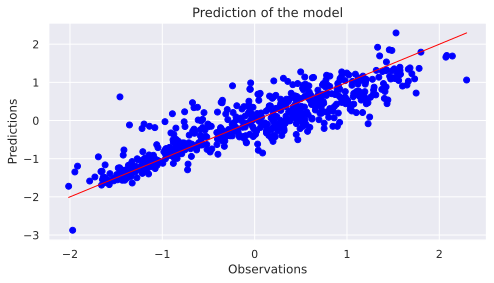

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
LinRidge=[]
LinRidge_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
LinRidge_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
LinRidge = [np.mean(LinRidge_R2), np.mean(LinRidge_RMSE)]
LinRidge = np.pad(LinRidge ,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Ridge Regularization'] = LinRidge
ModelCompare

RMSE= 0.53 - R2= 0.57 
RMSE= 0.44 - R2= 0.76 
RMSE= 0.42 - R2= 0.78 
RMSE= 0.43 - R2= 0.76 
RMSE= 0.41 - R2= 0.8 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization
0,R2,-0.292,0.592,0.734
1,RMSE,0.984,0.530,0.446
2,GridS-R2,NaN,NaN,NaN
3,GridS-RMSE,NaN,NaN,NaN


### B2. Elastic net regularisation

In [ ]:
Algorithm= linear_model.ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)


Model metrics
train RMSE= 0.54 - train R2= 0.67 
test RMSE= 0.58 - test R2= 0.64 


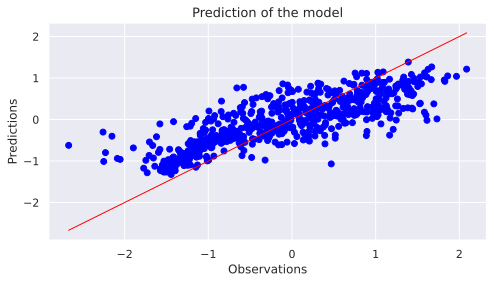

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
ElasticNet = []
ElasticNet_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
ElasticNet_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
ElasticNet = [np.mean(ElasticNet_R2), np.mean(ElasticNet_RMSE)]
ElasticNet = np.pad(ElasticNet,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['ElasticNet regularization'] = ElasticNet
ModelCompare

RMSE= 0.69 - R2= 0.28 
RMSE= 0.55 - R2= 0.61 
RMSE= 0.54 - R2= 0.63 
RMSE= 0.52 - R2= 0.64 
RMSE= 0.51 - R2= 0.7 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization
0,R2,-0.292,0.592,0.734,0.572
1,RMSE,0.984,0.530,0.446,0.562
2,GridS-R2,NaN,NaN,NaN,NaN
3,GridS-RMSE,NaN,NaN,NaN,NaN


### B3. Regularization: Parameters tuning

In [ ]:
ElasticNet_params = {
    "alpha" : [0.0001, 0.001, 0.1],
    "l1_ratio": [0, 0.2, 0.5, 0.8, 1]}

ElasticNetAlg = linear_model.ElasticNet()

ElasticNet_GSCV = GridSearchCV(ElasticNetAlg, ElasticNet_params , cv=5)

ElasticNet_GSCV.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+02, tolerance: 2.012e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+02, tolerance: 2.249e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/p

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.1],
                         'l1_ratio': [0, 0.2, 0.5, 0.8, 1]})

In [ ]:
ElasticNetAlg.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [ ]:
print(ElasticNet_GSCV.best_params_)
print(f'Best score: {ElasticNet_GSCV.best_score_}')

{'alpha': 0.001, 'l1_ratio': 0}
Best score: 0.7345958012730851


In [ ]:
ElasticNet_GSAlg = linear_model.ElasticNet(alpha=0.001, l1_ratio=0)

In [ ]:
ElasticNet_GS_R2 = cross_val_score(ElasticNet_GSAlg, x, y, cv=5, scoring=R2)
ElasticNet_GS_RMSE = cross_val_score(ElasticNet_GSAlg, x, y, cv=5, scoring=RMSE)
ElasticNet[2] = np.mean(ElasticNet_GS_R2)
ElasticNet[3] = np.mean(ElasticNet_GS_RMSE)

ModelCompare['ElasticNet regularization'] = ElasticNet
ModelCompare

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+02, tolerance: 2.012e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.53 - R2= 0.57 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+02, tolerance: 2.249e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.44 - R2= 0.76 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+02, tolerance: 2.180e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.42 - R2= 0.78 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+02, tolerance: 2.224e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.43 - R2= 0.76 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.412e+02, tolerance: 2.208e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.41 - R2= 0.8 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+02, tolerance: 2.012e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+02, tolerance: 2.249e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/p

,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization
0,R2,-0.292,0.592,0.734,0.572
1,RMSE,0.984,0.530,0.446,0.562
2,GridS-R2,NaN,NaN,NaN,0.734
3,GridS-RMSE,NaN,NaN,NaN,0.446


## C. SVM Regression

### C1. SVM Regressor: Linear

In [ ]:
Algorithm = SVR(kernel="linear", C=100, epsilon=0.1)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.43 - train R2= 0.79 
test RMSE= 0.43 - test R2= 0.8 


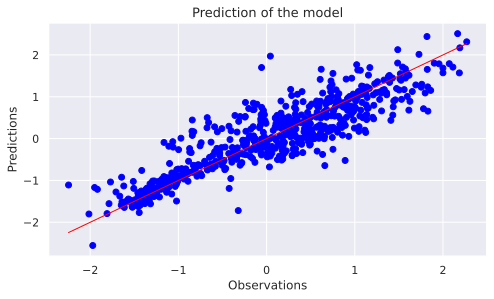

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
SVRLin=[]
SVRLin_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
SVRLin_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
SVRLin = [np.mean(SVRLin_R2), np.mean(SVRLin_RMSE)]
SVRLin = np.pad(SVRLin,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Linear SVM Resgression'] = SVRLin
ModelCompare

RMSE= 0.54 - R2= 0.54 
RMSE= 0.44 - R2= 0.75 
RMSE= 0.42 - R2= 0.78 
RMSE= 0.52 - R2= 0.64 
RMSE= 0.42 - R2= 0.8 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression
0,R2,-0.292,0.592,0.734,0.572,0.702
1,RMSE,0.984,0.530,0.446,0.562,0.468
2,GridS-R2,NaN,NaN,NaN,0.734,NaN
3,GridS-RMSE,NaN,NaN,NaN,0.446,NaN


### C2. SVM Regressor = Non linear (Polynomial kernel)

In [ ]:
Algorithm = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.33 - train R2= 0.88 
test RMSE= 0.5 - test R2= 0.68 


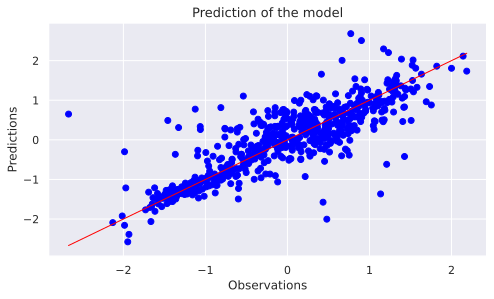

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
SVRPoly=[]
SVRPoly_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
SVRPoly_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
SVRPoly = [np.mean(SVRPoly_R2), np.mean(SVRPoly_RMSE)]
SVRPoly = np.pad(SVRPoly,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['SVM Regression: Polynomial kernel'] = SVRPoly
ModelCompare

RMSE= 0.58 - R2= 0.49 
RMSE= 0.49 - R2= 0.69 
RMSE= 0.44 - R2= 0.76 
RMSE= 0.44 - R2= 0.75 
RMSE= 0.42 - R2= 0.79 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474
2,GridS-R2,NaN,NaN,NaN,0.734,NaN,NaN
3,GridS-RMSE,NaN,NaN,NaN,0.446,NaN,NaN


### C3. SVM Regressor: Parameters tuning

In [ ]:
SVRAlg = SVR()

SVR_params = {
   'kernel':['rbf'],
   'gamma':[0.0001, 0.01, 1, 5],
   'C':[0.1, 10, 100, 1000],
   'epsilon' : [0.1, 1, 1,5] }


SVR_GSCV = GridSearchCV(SVRAlg , param_grid = SVR_params, cv=5)

SVR_GSCV.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 10, 100, 1000], 'epsilon': [0.1, 1, 1, 5],
                         'gamma': [0.0001, 0.01, 1, 5], 'kernel': ['rbf']})

In [ ]:
print(SVR_GSCV.best_params_)
print(f'Best score: {SVR_GSCV.best_score_}')

{'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.7808884295689585


In [ ]:
SVRGS_Alg = SVR(kernel="rbf", epsilon=0.1,  gamma=0.01, C=100)

In [ ]:
SVRGS_R2 = cross_val_score(SVRGS_Alg, x, y, cv=5, scoring=R2)

SVRGS_RMSE = cross_val_score(SVRGS_Alg, x, y, cv=5, scoring=RMSE)

SVRPoly[2] = np.mean(SVRGS_R2)
SVRPoly[3] = np.mean(SVRGS_RMSE)
SVRLin[2] = np.mean(SVRGS_R2)
SVRLin[3] = np.mean(SVRGS_RMSE)

ModelCompare['SVM Regression: Polynomial kernel'] = SVRPoly
ModelCompare['Linear SVM Resgression'] = SVRLin
ModelCompare

RMSE= 0.46 - R2= 0.68 
RMSE= 0.41 - R2= 0.79 
RMSE= 0.37 - R2= 0.82 
RMSE= 0.4 - R2= 0.79 
RMSE= 0.38 - R2= 0.83 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404


## D. Ensemble Algorithms

### D1. Random Forest Regression (Bagging)

#### D1.1. Defaulte parametrers

In [ ]:
Algorithm = RandomForestRegressor()

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.16 - train R2= 0.97 
test RMSE= 0.42 - test R2= 0.8 


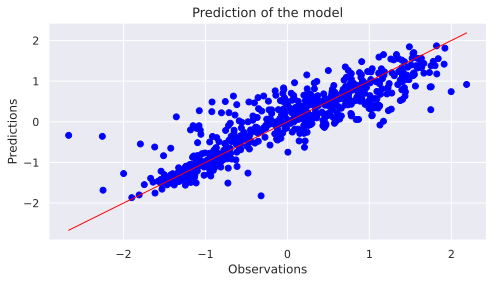

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
RFR=[]
RFR_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
RFR_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
RFR = [np.mean(RFR_R2), np.mean(RFR_RMSE)]
RFR = np.pad(RFR,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Random Forest'] = RFR
ModelCompare

RMSE= 0.52 - R2= 0.58 
RMSE= 0.44 - R2= 0.75 
RMSE= 0.39 - R2= 0.81 
RMSE= 0.42 - R2= 0.77 
RMSE= 0.4 - R2= 0.81 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel,Random Forest
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696,0.744
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474,0.434
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782,NaN
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404,NaN


#### D1.2. Random Forest - Parameters tuning

In [ ]:
RFRAlg = RandomForestRegressor()

RFR_params = {
   'max_leaf_nodes': [16, 24, 32 ],
   'max_samples': [0.8, 1],
   'bootstrap' : [True, False],
   'n_estimators': [300, 400, 500]
}

RFR_GSCV = GridSearchCV(RFRAlg, param_grid = RFR_params, cv=5)

RFR_GSCV.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    "`max_sample` cannot be set if `bootstrap=False`. "
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.


/usr/local/lib/python3.7/dist-packages/skle

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_leaf_nodes': [8, 16, 24], 'max_samples': [0.8, 1],
                         'n_estimators': [300, 400, 500]})

In [ ]:
print(RFR_GSCV.best_params_)
print(f'Best score: {RFR_GSCV.best_score_}')

{'bootstrap': True, 'max_leaf_nodes': 24, 'max_samples': 0.8, 'n_estimators': 500}
Best score: 0.6909450381653502


In [ ]:
RFRGS_Alg = RandomForestRegressor(bootstrap = True, max_leaf_nodes = 24, max_samples= 0.8, n_estimators = 500)

In [ ]:
RFRGS_R2 = cross_val_score(RFRGS_Alg, x, y, cv=5, scoring=R2)
RFRGS_RMSE = cross_val_score(RFRGS_Alg, x, y, cv=5, scoring=RMSE)
RFR[2] = np.mean(RFRGS_R2)
RFR[3] = np.mean(RFRGS_RMSE)

ModelCompare ['Random Forest'] = RFR
ModelCompare

RMSE= 0.59 - R2= 0.47 
RMSE= 0.47 - R2= 0.72 
RMSE= 0.44 - R2= 0.76 
RMSE= 0.46 - R2= 0.72 
RMSE= 0.43 - R2= 0.79 


,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel,Random Forest
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696,0.744
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474,0.434
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782,0.692
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404,0.478


### D2. XGBOOST (Boosting)

#### D2.1. Default parameters

In [ ]:
Algorithm = XGBRegressor()

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

[16:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model metrics
train RMSE= 0.36 - train R2= 0.86 
test RMSE= 0.4 - test R2= 0.82 


[14:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


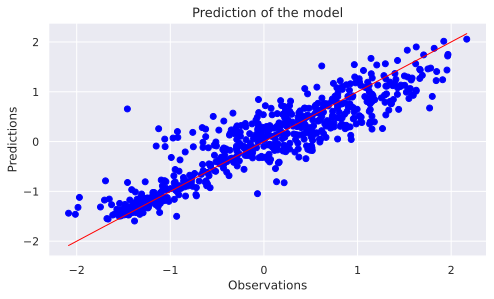

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
XGB=[]
XGB_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
XGB_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
XGB = [np.mean(XGB_R2), np.mean(XGB_RMSE)]
XGB = np.pad(XGB,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['XGBoost'] = XGB
ModelCompare

[16:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.49 - R2= 0.63 
[16:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.41 - R2= 0.79 
[16:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.39 - R2= 0.8 
[16:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.41 - R2= 0.78 
[16:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.39 - R2= 0.82 
[16:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel,Random Forest,XGBoost
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696,0.744,0.764
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474,0.434,0.418
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782,0.692,NaN
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404,0.478,NaN


#### D2.2. Parameters tuning

In [ ]:
XGBAlg = XGBRegressor()

XGB_params = {
   'max_depth':[3,4,5,6],
   'min_child_weight':[1,3,4,6],
   'gamma':[0, 0.1, 0.4, 0.5],
   'learning_rate':[0.01, 0.05, 0.1, 0.2]
   #,'n_estimators':[100, 500,700]
}

XGB_GSCV = GridSearchCV(XGBAlg, param_grid = XGB_params, cv=5)

XGB_GSCV.fit(x, y)

[14:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [0, 0.1, 0.4, 0.5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 4, 6]})

In [ ]:
print(XGB_GSCV.best_params_)
print(f'Best score: {XGB_GSCV.best_score_}')

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1}
Best score: 0.7766230068162592


In [ ]:
XGBGS_Alg = XGBRegressor(gamma=0, learning_rate= 0.2, max_depth= 5, min_child_weight= 1)

In [ ]:
XGBGS_R2 = cross_val_score(XGBGS_Alg, x, y, cv=5, scoring=R2)
XGBGS_RMSE = cross_val_score(XGBGS_Alg, x, y, cv=5, scoring=RMSE)
XGB[2] = np.mean(XGBGS_R2)
XGB[3] = np.mean(XGBGS_RMSE)

ModelCompare ['XGBoost'] = XGB
ModelCompare

[16:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.48 - R2= 0.64 
[16:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.41 - R2= 0.79 
[16:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.38 - R2= 0.82 
[16:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.39 - R2= 0.8 
[16:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.38 - R2= 0.83 
[16:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel,Random Forest,XGBoost
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696,0.744,0.764
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474,0.434,0.418
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782,0.692,0.776
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404,0.478,0.408


#### D2.3. Important features

[16:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


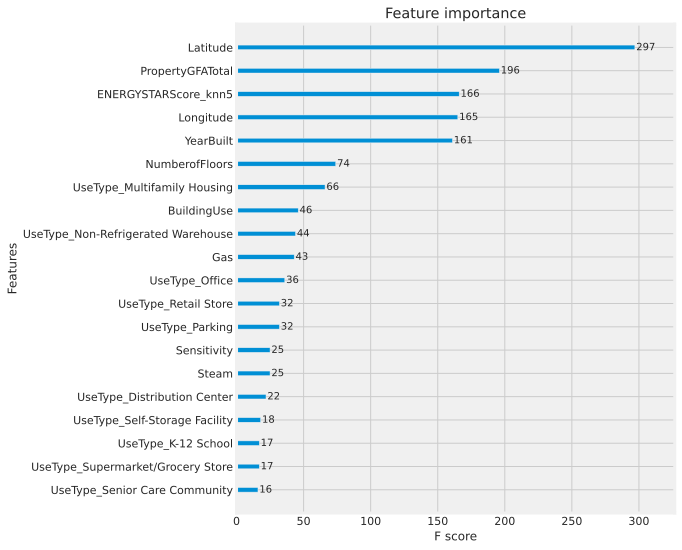

In [ ]:
%matplotlib inline

XGBGS_Alg.fit(x_train, y_train)
plt.figure(figsize=(7,9))
xgb.plot_importance(XGBGS_Alg, ax=plt.gca(), max_num_features = 20 )
plt.rcParams["figure.figsize"] = (20,100)
plt.show()

### D3. Stacking

In [ ]:
stackReg = StackingRegressor([('XGB', XGBGS_Alg), ('SVR', SVRGS_Alg), ('RFR', RFRGS_Alg) ])

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(stackReg, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

[15:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model metrics
train RMSE= 0.31 - train R2= 0.89 
test RMSE= 0.38 - test R2= 0.83 


In [ ]:
stack=[]
stack_R2 = cross_val_score(stackReg, x, y, cv=5, scoring=R2)
stack_RMSE = cross_val_score(stackReg, x, y, cv=5, scoring=RMSE)
stack = [np.mean(stack_R2), np.mean(stack_RMSE)]
stack = np.pad(stack,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Stacking Regressor'] = stack
ModelCompare

[16:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.45 - R2= 0.69 
[16:22:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

,Metrics,Dummy regressor,Linear Regression,Ridge Regularization,ElasticNet regularization,Linear SVM Resgression,SVM Regression: Polynomial kernel,Random Forest,XGBoost,Stacking Regressor
0,R2,-0.292,0.592,0.734,0.572,0.702,0.696,0.744,0.764,0.792
1,RMSE,0.984,0.530,0.446,0.562,0.468,0.474,0.434,0.418,0.394
2,GridS-R2,NaN,NaN,NaN,0.734,0.782,0.782,0.692,0.776,NaN
3,GridS-RMSE,NaN,NaN,NaN,0.446,0.404,0.404,0.478,0.408,NaN


## E. Best esimator

### E1. Models comparison

In [ ]:
data = ModelCompare.loc[:, ModelCompare.columns != 'Metrics']
fig = go.Figure(data=[
    go.Bar(name='R2', x=data.columns, y=data.iloc[0], text= round(data.iloc[0],2) ),
    go.Bar(name='R2-GridSearch', x=data.columns, y=data.iloc[2], text= round(data.iloc[2],2))
])
fig.update_layout(title= "GHG-Emission estimators performances: R-square")
fig.show()

# 9. Model score analysis

## 9.1 ENERGYSTARScore

In [ ]:
XE = df5.drop([OOBF[0],OOBF[1], OOBF[2], OOBF[3], OOBF[4],OOBF[5], OOBF[6], OOBF[7]  ] ,  axis=1)
ye = XE['TotalGHGEmissions']
XE=XE.drop(['TotalGHGEmissions'],axis=1)

r2 =cross_val_score(stackReg, XE, ye, cv=5, scoring=R2)
ESS_R2 = round(np.mean(r2),2)
ESS=['No ESS']

for i in range(6):
  XE[OOBF[i]] = df5[OOBF[i]]
  r2 = cross_val_score(stackReg, XE, ye, cv=5, scoring=R2)
  ESS_R2 = np.append(ESS_R2, round(np.mean(r2),2))
  ESS = np.append(ESS, OOBF[i])
  XE= XE.drop([OOBF[i]], axis=1)

[15:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.5 - R2= 0.61 
[15:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now dep

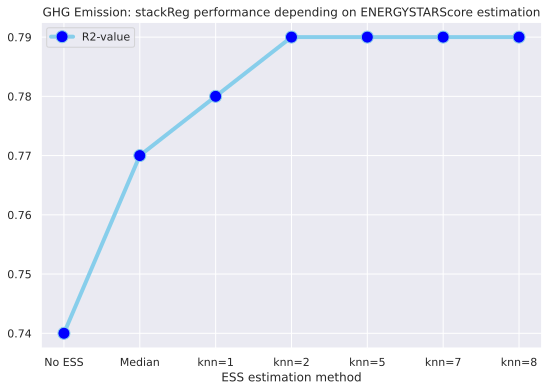

In [ ]:
ESS_df = pd.DataFrame({'Estimator' : ['No ESS', 'Median', 'knn=1', 'knn=2','knn=5', 'knn=7', 'knn=8'], 'R2-value': ESS_R2 })
plt.figure(figsize=(8, 6))
plt.plot( 'Estimator', 'R2-value', data=ESS_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.title('GHG Emission: stackReg performance depending on ENERGYSTARScore estimation')
plt.xlabel('ESS estimation method')
plt.show()

## 9.2. Residential, Non-residential buildings

In [ ]:
Xe = data_resid.drop([OOBF[0],OOBF[1],OOBF[2], OOBF[4],OOBF[5], OOBF[6], OOBF[7]  ] ,  axis=1)
ye = Xe['TotalGHGEmissions']
xe= Xe.drop(['TotalGHGEmissions'],axis=1)
r21 = cross_val_score(stackReg, xe, ye, cv=5, scoring=R2)
print(f'R2 of residential buildings: {round(np.mean(r21),2)}')

[15:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.32 - R2= 0.87 
[16:00:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

In [ ]:
Xe = data_Nresid.drop([OOBF[0],OOBF[1],OOBF[2], OOBF[4],OOBF[5], OOBF[6], OOBF[7]  ] ,  axis=1)
ye = Xe['TotalGHGEmissions']
xe= Xe.drop(['TotalGHGEmissions'],axis=1)
r22 = cross_val_score(stackReg, xe, ye, cv=5, scoring=R2)
print(f'R2 of Non-residential buildings: {round(np.mean(r22),2)}')

[16:01:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.41 - R2= 0.68 
[16:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

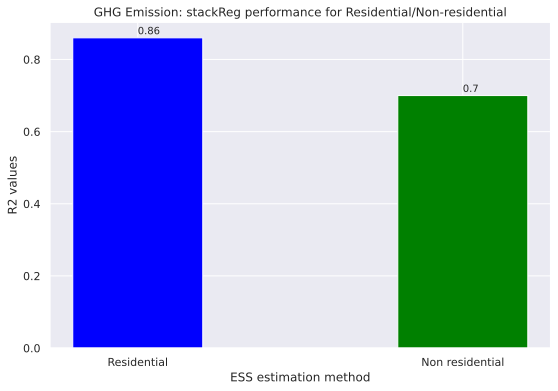

In [ ]:
r2 = [round(np.mean(r21),2), round(np.mean(r22),2)]
Type = ['Residential', 'Non residential']
plt.figure(figsize=(8, 6))
plt.bar(Type, r2, color=['blue','green'] ,width= 0.4 )
plt.title('GHG Emission: stackReg performance for Residential/Non-residential')
plt.xlabel('ESS estimation method')
plt.ylabel('R2 values')
plt.text(x= Type[0], y = r2[0]+0.01 , s=r2[0])
plt.text(x= Type[1], y = r2[1]+0.01 , s=r2[1])
plt.show()

# 10. Conclusion

• The best estimator for both energy consumption and GHG emission is the stacking regressor, a combination of the three tunned parameters algorithms: Random forest, SVM regressor and XGBoost.

• ENERGYSTARScore’s estimation has a remarquable effect on both models best estimator. Particularly for energy use where R square gains over than 0.1 thanks to a 6 neighboors KNN estimation of ENERGYSTARScore.

• The model is far more performant for residential buildings type (50% of data instances). For instance, energy use’s best model riches R2=0.9 performance against 0.75 for non residential type of buildings.